In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
df= pd.read_csv("/content/drive/MyDrive/business_final (1).csv")

<ipython-input-2-0e5b0cd51969>:1: DtypeWarning: Columns (54,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("/content/drive/MyDrive/business_final (1).csv")


In [ ]:
df.columns

Index(['hours.Saturday', 'attributes.BusinessAcceptsCreditCards',
       'hours.Monday', 'business_id', 'stars', 'attributes.BestNights',
       'address', 'attributes', 'attributes.HasTV',
       'attributes.RestaurantsAttire', 'hours.Wednesday', 'hours.Sunday',
       'attributes.Alcohol', 'attributes.WiFi', 'is_open',
       'attributes.DietaryRestrictions', 'attributes.WheelchairAccessible',
       'attributes.BikeParking', 'attributes.DriveThru',
       'attributes.OutdoorSeating', 'attributes.GoodForMeal',
       'attributes.BYOB', 'attributes.HairSpecializesIn', 'longitude',
       'attributes.RestaurantsDelivery', 'city', 'attributes.BYOBCorkage',
       'state', 'attributes.CoatCheck', 'attributes.RestaurantsPriceRange2',
       'attributes.Smoking', 'hours', 'hours.Friday',
       'attributes.AcceptsInsurance', 'attributes.RestaurantsGoodForGroups',
       'attributes.BusinessAcceptsBitcoin', 'categories',
       'attributes.ByAppointmentOnly', 'postal_code', 'attributes.Musi

In [ ]:

df["city"].value_counts().head()


Philadelphia    14569
Tucson           9249
Tampa            9050
Indianapolis     7540
Nashville        6971
Name: city, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 62 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   hours.Saturday                         110770 non-null  object 
 1   attributes.BusinessAcceptsCreditCards  119765 non-null  object 
 2   hours.Monday                           114474 non-null  object 
 3   business_id                            150346 non-null  object 
 4   stars                                  150346 non-null  float64
 5   attributes.BestNights                  5694 non-null    object 
 6   address                                145219 non-null  object 
 7   attributes                             136602 non-null  object 
 8   attributes.HasTV                       45084 non-null   object 
 9   attributes.RestaurantsAttire           39255 non-null   object 
 10  hours.Wednesday                        123771 non-null  

In [ ]:
# city Philadelphia : bool
cond_city = df['city'] == "Philadelphia"

In [ ]:
# Make a DataFrame that contains only the abovementioned columns, and name it as df_selected_business
# isnull: bool
cond_category_not_null = ~df["categories"].isnull()

In [ ]:
cond_category_restaurant = df["categories"].apply(str).str.contains("Restaurants")

In [ ]:
# Create filtered DataFrame, and name it df_filtered
df_filtered = df[cond_city & cond_category_not_null & cond_category_restaurant]

In [ ]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [ ]:
# Make a DataFrame that contains only the abovementioned columns, and name it as df_selected_business
df_selected_business = df_filtered[selected_features]

In [ ]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business.rename(columns={"stars":"avg_stars"}, inplace=True)

<ipython-input-12-216fc46aa9e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_business.rename(columns={"stars":"avg_stars"}, inplace=True)


In [ ]:
# Inspect your DataFrame
df_selected_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5852 entries, 3 to 150336
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   business_id  5852 non-null   object 
 1   name         5852 non-null   object 
 2   categories   5852 non-null   object 
 3   avg_stars    5852 non-null   float64
dtypes: float64(1), object(3)
memory usage: 228.6+ KB


In [ ]:
df_selected_business.head(5)

,business_id,name,categories,avg_stars
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",4.0
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,"Sushi Bars, Restaurants, Japanese",4.0
19,ROeacJQwBeh05Rqg7F6TCg,BAP,"Korean, Restaurants",4.5
28,QdN72BWoyFypdGJhhI5r7g,Bar One,"Cocktail Bars, Bars, Italian, Nightlife, Resta...",4.0
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,"Pizza, Restaurants, Salad, Soup",3.0


In [ ]:

df_selected_business.to_csv("philadephilla_business.csv", index=False, encoding="utf-8")

In [ ]:
pd.read_csv("philadephilla_business.csv", encoding="utf-8").head()

,business_id,name,categories,avg_stars
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",4.0
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,"Sushi Bars, Restaurants, Japanese",4.0
2,ROeacJQwBeh05Rqg7F6TCg,BAP,"Korean, Restaurants",4.5
3,QdN72BWoyFypdGJhhI5r7g,Bar One,"Cocktail Bars, Bars, Italian, Nightlife, Resta...",4.0
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,"Pizza, Restaurants, Salad, Soup",3.0


In [ ]:
review=pd.read_csv("/content/drive/MyDrive/yelp_review_final.csv")

In [ ]:
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
3,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
4,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31


In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283029 entries, 0 to 283028
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    283029 non-null  object
 1   user_id      283029 non-null  object
 2   business_id  283029 non-null  object
 3   stars        283029 non-null  int64 
 4   useful       283029 non-null  int64 
 5   funny        283029 non-null  int64 
 6   cool         283029 non-null  int64 
 7   text         283029 non-null  object
 8   date         283029 non-null  object
dtypes: int64(4), object(5)
memory usage: 19.4+ MB


In [ ]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = df_selected_business.set_index('business_id')

In [ ]:
review["date"].max()

'2021-09-02 00:11:15'

In [ ]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
# Also filter date after '2017-02-01'
df_review = review[review['date']>'2017-02-01'].set_index('business_id')

In [ ]:
df_review

,review_id,user_id,stars,useful,funny,cool,text,date
business_id,,,,,,,,
XQfwVwDr-v0ZS3_CbbE5Xw,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
cPepkJeRMtHapc_b2Oe_dw,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,4,1,0,1,I was really between 3 and 4 stars for this on...,2018-07-17 03:30:07
bMratNjTG5ZFEA6hVyr-xQ,-P5E9BYUaK7s3PwBF5oAyg,Jha0USGDMefGFRLik_xFQg,5,0,0,0,First time there and it was excellent!!! It fe...,2017-02-19 13:32:05
0pMj5xUAecW9o1P35B0AMw,40thYphUgIfvJq17QCfTwA,QzCEzH3R7Z6erOGLr3t55Q,5,1,0,1,Great staff always helps and always nice. Alwa...,2017-05-26 13:10:24
kq5Ghhh14r-eCxlVmlyd8w,JBWZmBy69VMggxj3eYn17Q,aFa96pz67TwOFu4Weq5Agg,5,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38
...,...,...,...,...,...,...,...,...
ZapDvyE7lJxVxlmeeKyjkg,nlQF10Q_9tzh4PZqv52M7Q,ttn01jq3Agq76xdBiFgPlw,5,1,0,1,Great food. \n\nAnd the service was great by J...,2019-02-25 03:36:16
5Y_TiS_KJAgJMf9ZiKutEQ,rE84zhHzxGcl-VIEDV7qLA,RqbpeQB4FyNEigv0Dx-XWQ,4,0,0,0,Steak sandwich and fries steak sandwich and fr...,2018-10-04 20:50:27
kQRB8RNwd7cEMcURTS-I7A,VcdeItekZswCNUVCUTk3zA,aF56vJ17QYZolYHgsruIIA,5,1,0,0,Had the vegan tofu scramble and it was so good...,2018-03-30 22:48:42


In [ ]:
# Join df_left and df_right. What type of join?
df_final = df_left.join(df_review,how='inner')

In [ ]:
# You may want to reset the index 
df_final = df_final.reset_index()

In [ ]:
df_final.shape

(12282, 12)

(array([1290.,  885., 1342., 2856., 5909.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

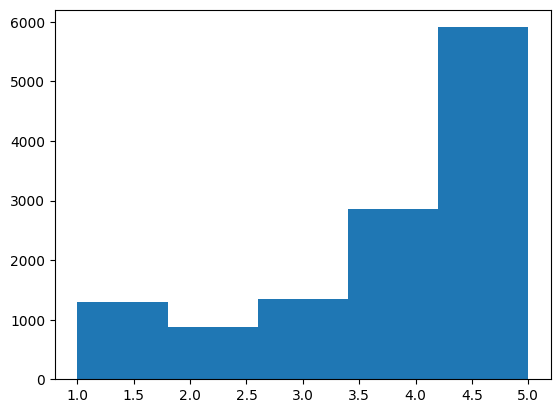

In [ ]:
plt.hist(df_final['stars'], bins = 5)
# The histogram of the stars distribution. 

In [ ]:
df_final["categories"].value_counts()

Active Life, Beer Gardens, Grocery, Middle Eastern, Specialty Food, American (New), Parks, Cafes, Food, Nightlife, Restaurants, Coffee & Tea, Lebanese    364
Malaysian, Asian Fusion, Cambodian, Chinese, Restaurants, Thai                                                                                            235
Restaurants, American (New), Breakfast & Brunch, Burgers                                                                                                  218
American (New), Restaurants, Southern, Diners, American (Traditional)                                                                                     183
Restaurants, Italian                                                                                                                                      178
                                                                                                                                                         ... 
Restaurants, Delis                                  

In [ ]:
df_final["Mexican"] = df_final["categories"].apply(lambda x: "Mexic" in x)

In [ ]:

df_final['count'] = df_final.groupby('business_id')['business_id'].transform('count')




In [ ]:
df_final

,business_id,name,categories,avg_stars,review_id,user_id,stars,useful,funny,cool,text,date,Mexican,count
0,-ATiAtTikuGuqvaW2O6tNA,Marathon,"Sandwiches, American (New), Lounges, Nightlife...",3.5,7FLXp3VCE1RHOqsGBk2JNg,OBoeuSW39_uwUXGtN4vdOA,4,0,0,0,"Straight to the point: the service, the one di...",2017-09-09 12:33:12,False,113
1,-ATiAtTikuGuqvaW2O6tNA,Marathon,"Sandwiches, American (New), Lounges, Nightlife...",3.5,DGkj-4PdsCtzQUtN5A42tA,mhwNRi3mBekFM-9zN2aRxw,5,0,0,0,Great turkey burger. I would've taken a photo ...,2017-11-10 18:48:06,False,113
2,-ATiAtTikuGuqvaW2O6tNA,Marathon,"Sandwiches, American (New), Lounges, Nightlife...",3.5,ulLwjsg4vc-tjsLI3lx6QQ,PWjXfHHm5LQhyPgZcedLzA,3,0,0,0,I ordered the turkey chilli and it was sold ou...,2018-03-19 11:13:32,False,113
3,-ATiAtTikuGuqvaW2O6tNA,Marathon,"Sandwiches, American (New), Lounges, Nightlife...",3.5,29pECaECmT2iHVDK_gY8bA,s2apTe1qD9Bytunpj4enMw,4,0,0,0,Went here with friends on a Thursday evening a...,2018-07-18 00:49:32,False,113
4,-ATiAtTikuGuqvaW2O6tNA,Marathon,"Sandwiches, American (New), Lounges, Nightlife...",3.5,jS-Se0swmLUwYsFjeNoLTg,QZy2N84_45OkPU_oUxy6Dw,4,0,0,0,Great place. We had excellent 4 star vegetaria...,2017-02-20 01:11:49,False,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12277,zwTmOj4B_OVPMTMYijQiKg,Queen Sheba,"Nightlife, Restaurants, Sports Bars, Bars, Eth...",4.0,vTN_VHaE8oTdGyucLmk6Sw,S6qCyr_IdFjgHoAjVCh5IA,3,1,0,0,Great neighborhood spot for cheap drinks along...,2018-02-13 03:09:38,False,4
12278,zwTmOj4B_OVPMTMYijQiKg,Queen Sheba,"Nightlife, Restaurants, Sports Bars, Bars, Eth...",4.0,hd6aC9cshutPdG5q3L4foA,UE6e9sCOFW5qSzginRxmHw,2,1,0,0,I went here on a Friday night with some friend...,2017-09-03 23:39:08,False,4
12279,zwTmOj4B_OVPMTMYijQiKg,Queen Sheba,"Nightlife, Restaurants, Sports Bars, Bars, Eth...",4.0,B5eX8Igw9vDCd48gxaIVCw,pwPeYSSXBixpsCn6l1meOA,4,1,0,0,"I adore Ethiopian food, and this place did not...",2017-04-25 15:22:28,False,4
12280,zwTmOj4B_OVPMTMYijQiKg,Queen Sheba,"Nightlife, Restaurants, Sports Bars, Bars, Eth...",4.0,siqVMKtZWoprj4yJhkIfwg,PyTZL_WXo8anb4Bju5-xFA,5,2,1,2,"I am new to Ethiopian Food, but this place is ...",2019-07-15 00:28:43,False,4


In [ ]:
df_final[df_final["Mexican"] == True]["stars"].value_counts()

5    354
4    193
1    118
2     84
3     77
Name: stars, dtype: int64

(array([118.,  84.,  77., 193., 354.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

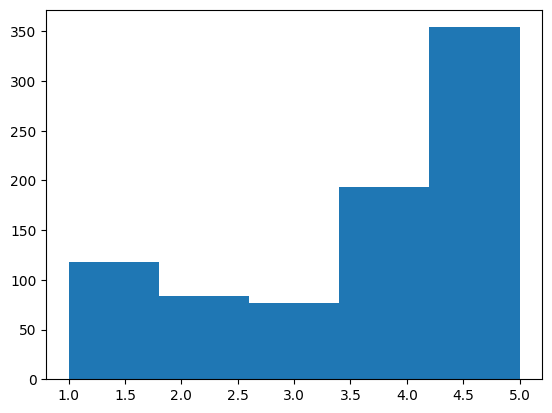

In [ ]:
#pick mexican restrunt as an example 
plt.hist(df_final[df_final["Mexican"] == True]["stars"], bins = 5)

In [ ]:
import numpy as np

In [ ]:
business_id = list(df_final.groupby(['business_id'])['review_id'].count().index)
resturant_name = [pd.unique(df_final[df_final['business_id'] == res]['name'])[0] for res in business_id]
popularity = list(df_final.groupby(['business_id'])['review_id'].count())

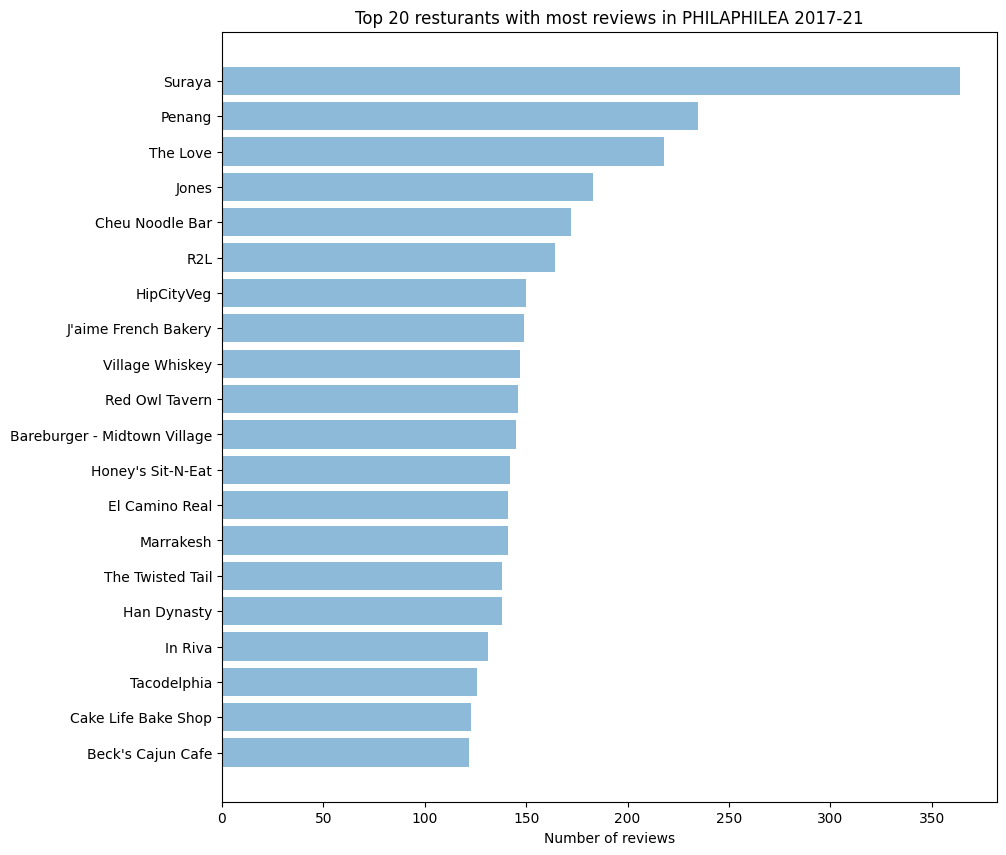

In [ ]:
plt.figure(figsize=(10,10))
objects = [resturant_name[i] for i in np.argsort(popularity)[::-1][:20]]
y_pos = np.arange(len(objects))
plt.barh(y_pos, np.sort(popularity)[::-1][:20], align='center', alpha = 0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of reviews')
plt.title('Top 20 resturants with most reviews in PHILAPHILEA 2017-21')
plt.gca().invert_yaxis()

In [ ]:
df_final.to_csv('2017-2021_restaurant(2)_reviews.csv',index=False)